### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#### Load the health insurance dataset and check the first five observations

In [4]:
hi = pd.read_csv('health_insurance.csv')
hi.head()

age gender     bmi  bp   children     region      smoker  medical_cost
0   23      M  31.900  157         0  southwest      smoker   16884.92400
1   20      F  36.770  160         1  southeast  non-smoker    1725.55230
2   33      F  35.000  145         3  southeast  non-smoker    4449.46200
3   37      F  23.705  153         0  northwest  non-smoker   21984.47061
4   36      F  27.880  156         0  northwest  non-smoker    3866.85520

### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

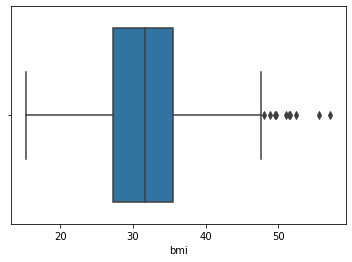

In [5]:
sns.boxplot(hi['bmi'])
plt.show()

- Yes, there are extreme values present.
- The extreme values present are starting from 48 BMI.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness of Age column is 0.04359793424360781


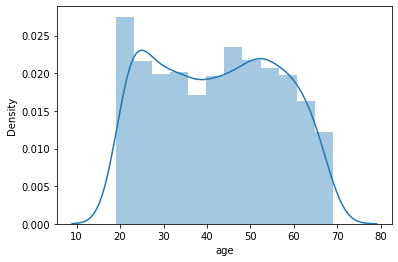

In [6]:
print('Skewness of Age column is',hi['age'].skew())
sns.distplot(hi['age'])
plt.show()

- Can be infered as yes but no need to normalize as the graph is skewed very very less and is close to 0.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

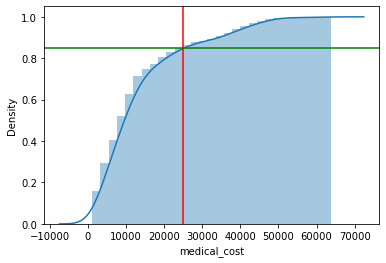

In [7]:
sns.distplot(hi['medical_cost'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.axvline(25000, color='r')
plt.axhline(0.85, color='g')
plt.show()

- The probability that the individuals have charged less than 25k for medical treatment is 85%

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The Skewness for the BMI table is 0.2496769760401315 which is slightly right skewed but can be considered as normal distribution due to being very close to 0.




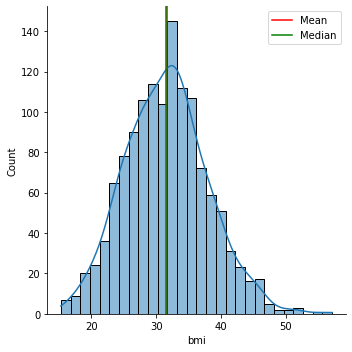

In [8]:
print('The Skewness for the BMI table is',hi['bmi'].skew(),'which is slightly right skewed but can be considered as normal distribution due to being very close to 0.')
print('\n')
sns.displot(hi['bmi'],kde=True)
plt.axvline(hi['bmi'].mean(),label='Mean', color='r')
plt.axvline(hi['bmi'].median(),label="Median",color='g')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

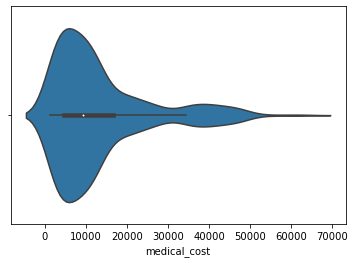

In [9]:
sns.violinplot(hi['medical_cost'])
plt.show()

- We can see it has a lot of outliers.
- Most of the data points we can see are behind the median.

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
hi30a=hi[hi['age']<30]
hi30a40k=hi30a[hi30a['medical_cost']>40000]
print(hi30a40k)

      age gender    bmi  bp   children     region  smoker  medical_cost
254    26      F  47.54  156         2  northeast  smoker    42112.2356
1009   25      F  55.58  152         1  northeast  smoker    44501.3982
1086   26      M  41.75  152         1  northeast  smoker    40904.1995


- Yes, there are 3 individuals with age less then 30 and medical cost more than 40k.


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

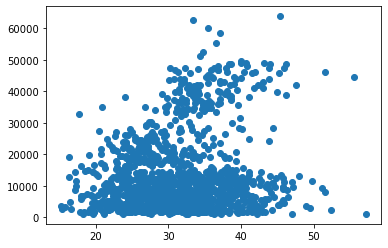

In [11]:
plt.scatter(x='bmi',y='medical_cost',data=hi)
plt.show()

- Yes, we can see there are outliers when BMI and Medical Costs are evaluated for the model and seems to be above 50k for Medical Costs and 50 for BMI

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
himean=hi['bmi'].groupby(hi['gender']).mean()
histd=hi['bmi'].groupby(hi['gender']).std()
percvar=(histd/himean)*100
print(percvar)

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
him = hi[hi['gender']=='M']
hirmale = him['gender'].groupby(him['region'])
print(hirmale.value_counts().nlargest(1))

region     gender
southeast  M         178
Name: gender, dtype: int64


- Southeast has the highest number of males.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

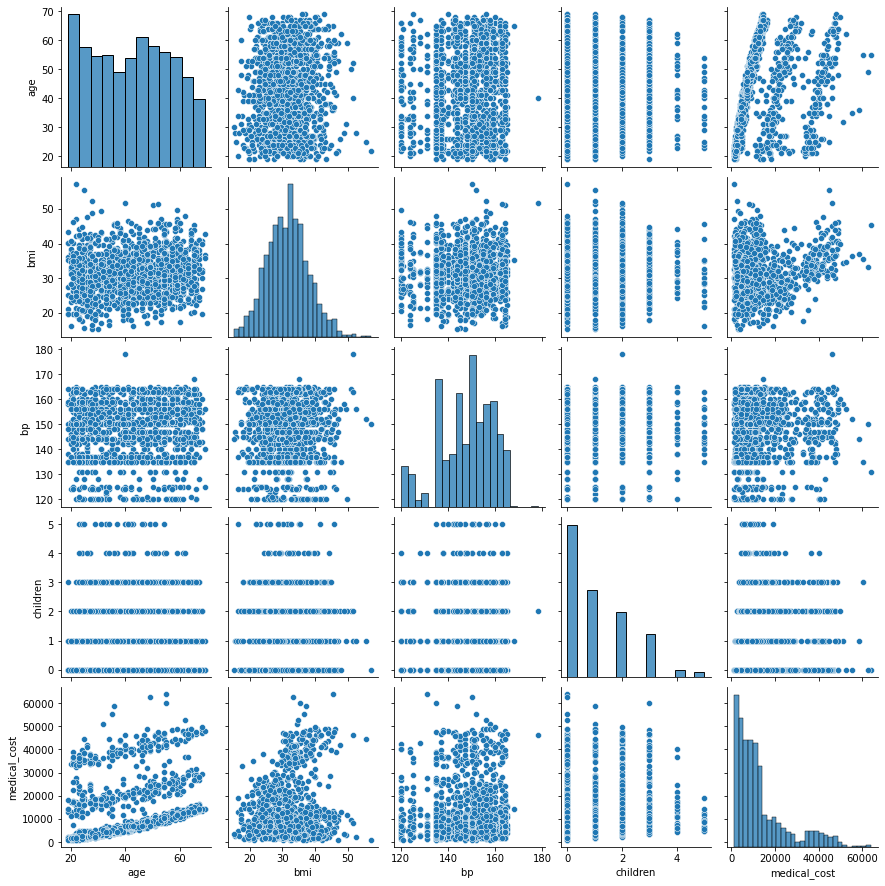

In [14]:
sns.pairplot(hi)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

non-smoker    1035
smoker         265
Name: smoker, dtype: int64


smoker
non-smoker    8.741353e+06
smoker        8.474826e+06
Name: medical_cost, dtype: float64




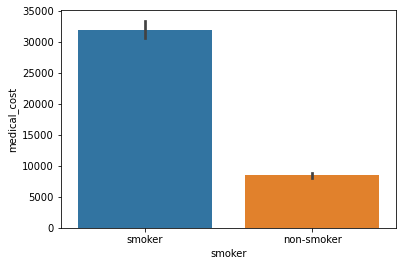

In [15]:
hismoker = hi['smoker'].value_counts()
hismmed = hi['medical_cost'].groupby(hi['smoker']).sum().nlargest(5)
print(hismoker)
print('\n')
print(hismmed)
print('\n')
sns.barplot(x='smoker',y='medical_cost',data=hi)
plt.show()

- From above estimations we can see that there are very less smokers in the dataset compared to non-smokers but are having the amount closer to the medical costs in total with respect to non-smokers where we can suggest that; Yes, the medical costs increases for individual smokers.

- Also the graph proves the theory given above.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

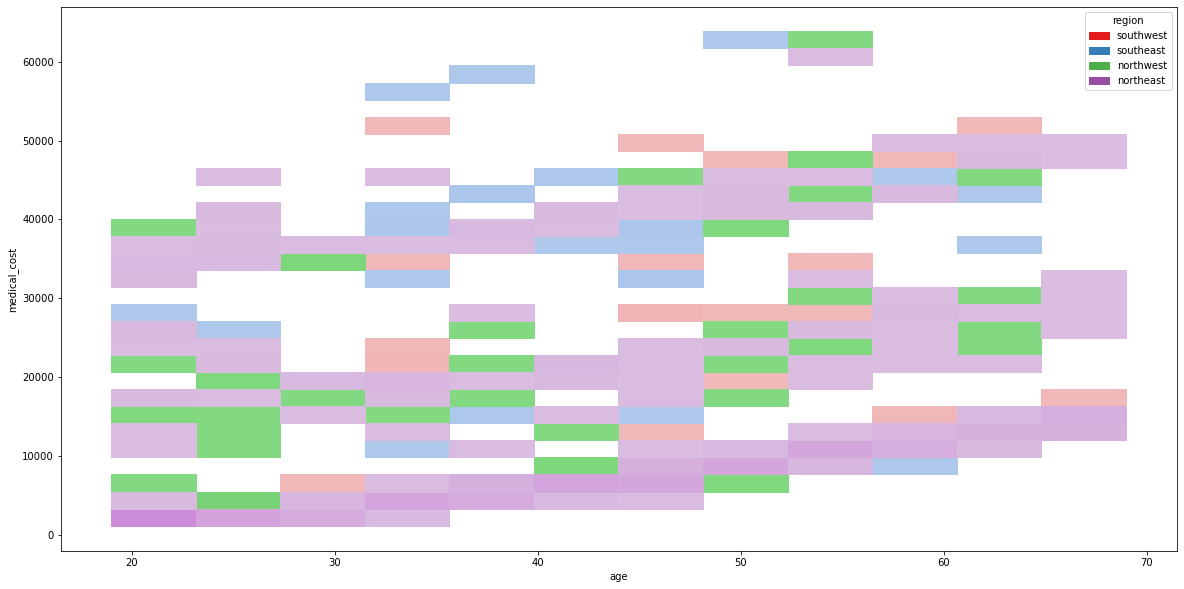

In [16]:
plt.figure(figsize=(20,10))
sns.histplot(x='age',y='medical_cost',hue='region',data=hi,kde=True,palette='Set1')
plt.show()

- We can see from the plot that people who are residing in the region of southeast and are more than the age of 40 will experience an impact on the medical costs.

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

In [17]:
hi.head()

age gender     bmi  bp   children     region      smoker  medical_cost
0   23      M  31.900  157         0  southwest      smoker   16884.92400
1   20      F  36.770  160         1  southeast  non-smoker    1725.55230
2   33      F  35.000  145         3  southeast  non-smoker    4449.46200
3   37      F  23.705  153         0  northwest  non-smoker   21984.47061
4   36      F  27.880  156         0  northwest  non-smoker    3866.85520

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
hidummy = pd.get_dummies(hi,columns=['age','gender','region','smoker'],drop_first=True)
hidummy.head()


bmi  bp   children  medical_cost  age_20  age_21  age_22  age_23  \
0  31.900  157         0   16884.92400       0       0       0       1   
1  36.770  160         1    1725.55230       1       0       0       0   
2  35.000  145         3    4449.46200       0       0       0       0   
3  23.705  153         0   21984.47061       0       0       0       0   
4  27.880  156         0    3866.85520       0       0       0       0   

   age_24  age_25  ...  age_65  age_66  age_67  age_68  age_69  gender_M  \
0       0       0  ...       0       0       0       0       0         1   
1       0       0  ...       0       0       0       0       0         0   
2       0       0  ...       0       0       0       0       0         0   
3       0       0  ...       0       0       0       0       0         0   
4       0       0  ...       0       0       0       0       0         0   

   region_northwest  region_southeast  region_southwest  smoker_smoker  
0                 0                 0                 1              1  
1                 0                 1                 0              0  
2                 0                 1                 0              0  
3                 1                 0                 0              0  
4                 1                 0                 0              0  

[5 rows x 59 columns]

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
hi['smoker_label']=hi['smoker'].replace({'smoker':1,'non-smoker':0})
hi.head()

age gender     bmi  bp   children     region      smoker  medical_cost  \
0   23      M  31.900  157         0  southwest      smoker   16884.92400   
1   20      F  36.770  160         1  southeast  non-smoker    1725.55230   
2   33      F  35.000  145         3  southeast  non-smoker    4449.46200   
3   37      F  23.705  153         0  northwest  non-smoker   21984.47061   
4   36      F  27.880  156         0  northwest  non-smoker    3866.85520   

   smoker_label  
0             1  
1             0  
2             0  
3             0  
4             0

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
higen = hi['gender'].value_counts(normalize=True)
hi['gender_freq'] = hi['gender'].map(higen)
hi.head()

age gender     bmi  bp   children     region      smoker  medical_cost  \
0   23      M  31.900  157         0  southwest      smoker   16884.92400   
1   20      F  36.770  160         1  southeast  non-smoker    1725.55230   
2   33      F  35.000  145         3  southeast  non-smoker    4449.46200   
3   37      F  23.705  153         0  northwest  non-smoker   21984.47061   
4   36      F  27.880  156         0  northwest  non-smoker    3866.85520   

   smoker_label  gender_freq  
0             1     0.494615  
1             0     0.505385  
2             0     0.505385  
3             0     0.505385  
4             0     0.505385

<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
ss= StandardScaler()
hi['ZBMI']=ss.fit_transform(hi[['bmi']])
#sns.distplot(hi['ZBMI'])
print("Mean:",hi['ZBMI'].mean(),"\n","\n","Variance:",hi['ZBMI'].var())

Mean: -5.143535170431662e-16 
 
 Variance: 1.0007698229407238


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

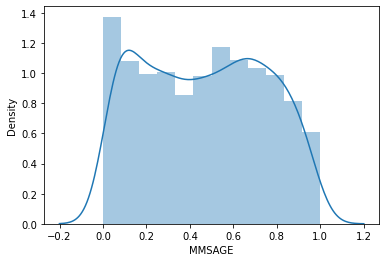

In [23]:
mms= MinMaxScaler()
hi['MMSAGE']=mms.fit_transform(hi[['age']])
sns.distplot(hi['MMSAGE'])
plt.show()


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The skewness is 1.5341854555059413 which is right skewed. We will solve this by log transformation.




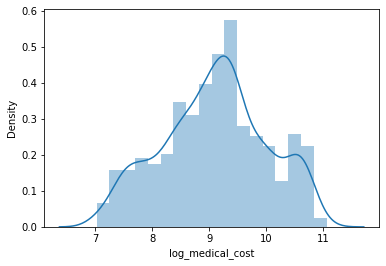

In [24]:
hiskew = hi['medical_cost'].skew()
print('The skewness is',hiskew,'which is right skewed. We will solve this by log transformation.')
print('\n')
hi['log_medical_cost']=np.log(hi['medical_cost'])
sns.distplot(hi['log_medical_cost'])
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

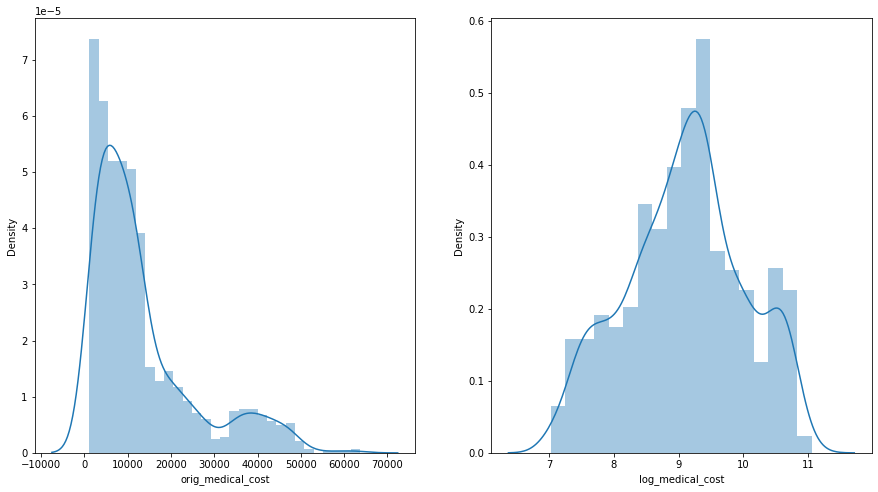

In [25]:
hi['orig_medical_cost']=np.exp(hi['log_medical_cost'])
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.distplot(hi['orig_medical_cost'],ax=axes[0])
sns.distplot(hi['log_medical_cost'],ax=axes[1])
plt.show()